In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm_notebook
np.set_printoptions(suppress=True)
from sklearn import preprocessing
from tqdm import tqdm
import decimal
from random import shuffle
from time import sleep
tqdm.pandas()
from sklearn.preprocessing import LabelEncoder
import gc
import datetime
import os
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
import random

In [2]:
#Always seed the randomness of this universe
def seed_everything(seed=51):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [3]:
seed_everything(seed=51)

In [73]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [5]:
%%time
train = pd.read_csv('../input/train3.csv')
print("train finished")

train finished
CPU times: user 39.9 s, sys: 3.24 s, total: 43.2 s
Wall time: 43.2 s


In [6]:
%%time
test = pd.read_csv('../input/test3.csv')
print("test finished")

test finished
CPU times: user 35.4 s, sys: 2.3 s, total: 37.7 s
Wall time: 37.6 s


In [7]:
#sample_submission
sample_submission = pd.read_csv('../input/sample_submission.csv')
print(train.shape,test.shape,sample_submission.shape)

(590540, 799) (506691, 798) (506691, 2)


In [8]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_17,id_18,id_19,id_20,id_30,id_31,id_32,id_33,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DT,month,weekofyear,dayofyear,hour,dayofweek,day,card1_999999,card1_fraudulent,card2_999999,card2_fraudulent,card3_999999,card3_185.0,card4_discover,card5_nan,card5_999999,card5_137.0,card5_118.0,card5_100.0,card5_150.0,card5_229.0,card5_117.0,card5_166.0,card5_126.0,is_debit,ProductCD_C,ProductCD_W,addr1_999999,addr1_nan,addr1_888888.0,addr1_191.0,addr1_184.0,addr1_436.0,addr1_143.0,addr1_205.0,addr1_194.0,addr1_494.0,addr1_444.0,addr2_999999,addr2_nan,addr2_96.0,addr2_999999.0,TransactionAmt_decimal,TransactionAmt_check,dist1_999999,dist1_nan,dist1_91.0,dist1_130.0,dist1_116.0,dist1_108.0,dist1_86.0,dist1_95.0,dist1_114.0,dist1_33.0,dist1_12.0,dist1_27.0,dist1_50.0,dist1_55.0,dist1_54.0,dist1_42.0,dist1_47.0,dist1_35.0,dist1_43.0,dist1_49.0,dist2_999999,dist2_nan,dist2_0.0,dist2_9.0,dist2_1.0,dist2_10.0,dist2_68.0,dist2_999999.0,dist2_7.0,P_emaildomain_prefix,P_emaildomain_suffix,P_emaildomain_lesscategory,P_emaildomain_999999,P_emaildomain_nan,P_emaildomain_mail.com,P_emaildomain_outlook.es,P_emaildomain_aim.com,P_emaildomain_outlook.com,P_emaildomain_roadrunner.com,P_emaildomain_verizon.net,P_emaildomain_att.net,P_emaildomain_sbcglobal.net,P_emaildomain_rocketmail.com,P_emaildomain_windstream.net,P_emaildomain_hotmail.fr,P_emaildomain_protonmail,R_emaildomain_prefix,R_emaildomain_suffix,R_emaildomain_lesscategory,R_emaildomain_999999,R_emaildomain_nan,R_emaildomain_protonmail,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_icloud.com,R_emaildomain_gmail.com,R_emaildomain_bellsouth.net,R_emaildomain_sbcglobal.net,R_emaildomain_msn.com,R_emaildomain_verizon.net,R_emaildomain_hotmail.fr,R_emaildomain_att.net,group_1_mean,group_1_median,group_1_min,group_1_max,group_1_sum,group_1_std,group_1_kurtosis,group_2_mean,group_2_median,group_2_min,group_2_max,group_2_sum,group_2_std,group_2_kurtosis,group_3_mean,group_3_median,group_3_min,group_3_max,group_3_sum,group_3_std,group_3_kurtosis,group_4_mean,group_4_median,group_4_min,group_4_max,group

In [9]:
def less_category(x):
    if x in temp:
        return x
    else:
        return 999999

In [10]:
def less_category_str(x):
    if x in temp:
        return x
    else:
        return '999999'

# DeviceType

In [75]:
column_name = 'DeviceType'

In [12]:
train[column_name].head()

0       NaN
1       NaN
2       NaN
3       NaN
4    mobile
Name: DeviceType, dtype: object

In [13]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(449730, 369760)

In [14]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.7615572188166763, 0.7297544262676858)

In [15]:
train[column_name].nunique(),test[column_name].nunique()

(2, 2)

In [16]:
train[column_name].unique()[:5]

array([nan, 'mobile', 'desktop'], dtype=object)

In [17]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

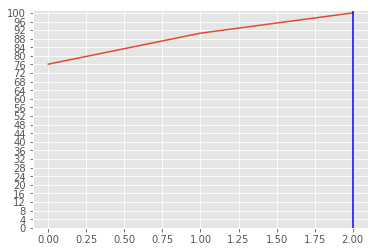

In [18]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(2,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [19]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(100).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

3
3


In [20]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [21]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [22]:
temp.head()

,isFraud,DeviceType,fraud_count
mobile,0.101662,55645,5657.0
desktop,0.065215,85165,5554.0
888888,0.021017,449730,9452.0


In [23]:
fraudulent_card = ['mobile']

In [24]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [76]:
del train[column_name]
del test[column_name]
gc.collect()

14605

# DeviceInfo

In [25]:
column_name = 'DeviceInfo'

In [26]:
train[column_name].head()

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4    SAMSUNG SM-G892A Build/NRD90M
Name: DeviceInfo, dtype: object

In [27]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(471874, 391634)

In [28]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.7990551021099332, 0.7729247213785128)

In [29]:
train[column_name].nunique(),test[column_name].nunique()

(1786, 2226)

In [30]:
train[column_name].unique()[:5]

array([nan, 'SAMSUNG SM-G892A Build/NRD90M', 'iOS Device', 'Windows',
       'MacOS'], dtype=object)

In [31]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

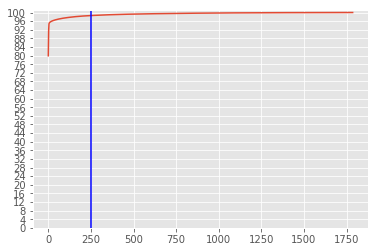

In [32]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(250,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [33]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(250).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

250
186


In [34]:
train[column_name] = train[column_name].apply(less_category_str)
test[column_name] = test[column_name].apply(less_category_str)

In [35]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == '999999' else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == '999999' else 0)

In [36]:
train[column_name + '_999999'].sum(),test[column_name + '_999999'].sum()

(11097, 22879)

In [37]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [38]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [39]:
temp.head()

,isFraud,DeviceInfo,fraud_count
SM-G955F,1.000000,2,2.0
hi6210sft Build/MRA58K,0.947368,190,180.0
LG-D320 Build/KOT49I.V10a,0.859155,71,61.0
SM-A300H Build/LRX22G,0.832512,203,169.0
KFFOWI Build/LVY48F,0.784615,65,51.0


In [40]:
mask1 = ((temp['isFraud'] > 0.07) & (temp[column_name] > 400)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 450))

In [41]:
fraudulent_card = [x for x in list(temp[mask1].index)]
try:
    fraudulent_card.remove('888888')
except:
    print("{} not in fraudulent_card".format(888888.0))
try:
    fraudulent_card.remove('999999')
except:
    print("{} not in fraudulent_card".format(999999.0))   

888888.0 not in fraudulent_card


In [42]:
print(fraudulent_card)

['SM-J700M Build/MMB29K', 'rv:57.0', 'SM-G531H Build/LMY48B', 'SM-G610M Build/MMB29K', 'Trident/7.0']


In [43]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [44]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

In [45]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_17,id_18,id_19,id_20,id_30,id_31,id_32,id_33,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DT,month,weekofyear,dayofyear,hour,dayofweek,day,card1_999999,card1_fraudulent,card2_999999,card2_fraudulent,card3_999999,card3_185.0,card4_discover,card5_nan,card5_999999,card5_137.0,card5_118.0,card5_100.0,card5_150.0,card5_229.0,card5_117.0,card5_166.0,card5_126.0,is_debit,ProductCD_C,ProductCD_W,addr1_999999,addr1_nan,addr1_888888.0,addr1_191.0,addr1_184.0,addr1_436.0,addr1_143.0,addr1_205.0,addr1_194.0,addr1_494.0,addr1_444.0,addr2_999999,addr2_nan,addr2_96.0,addr2_999999.0,TransactionAmt_decimal,TransactionAmt_check,dist1_999999,dist1_nan,dist1_91.0,dist1_130.0,dist1_116.0,dist1_108.0,dist1_86.0,dist1_95.0,dist1_114.0,dist1_33.0,dist1_12.0,dist1_27.0,dist1_50.0,dist1_55.0,dist1_54.0,dist1_42.0,dist1_47.0,dist1_35.0,dist1_43.0,dist1_49.0,dist2_999999,dist2_nan,dist2_0.0,dist2_9.0,dist2_1.0,dist2_10.0,dist2_68.0,dist2_999999.0,dist2_7.0,P_emaildomain_prefix,P_emaildomain_suffix,P_emaildomain_lesscategory,P_emaildomain_999999,P_emaildomain_nan,P_emaildomain_mail.com,P_emaildomain_outlook.es,P_emaildomain_aim.com,P_emaildomain_outlook.com,P_emaildomain_roadrunner.com,P_emaildomain_verizon.net,P_emaildomain_att.net,P_emaildomain_sbcglobal.net,P_emaildomain_rocketmail.com,P_emaildomain_windstream.net,P_emaildomain_hotmail.fr,P_emaildomain_protonmail,R_emaildomain_prefix,R_emaildomain_suffix,R_emaildomain_lesscategory,R_emaildomain_999999,R_emaildomain_nan,R_emaildomain_protonmail,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_icloud.com,R_emaildomain_gmail.com,R_emaildomain_bellsouth.net,R_emaildomain_sbcglobal.net,R_emaildomain_msn.com,R_emaildomain_verizon.net,R_emaildomain_hotmail.fr,R_emaildomain_att.net,group_1_mean,group_1_median,group_1_min,group_1_max,group_1_sum,group_1_std,group_1_kurtosis,group_2_mean,group_2_median,group_2_min,group_2_max,group_2_sum,group_2_std,group_2_kurtosis,group_3_mean,group_3_median,group_3_min,group_3_max,group_3_sum,group_3_std,group_3_kurtosis,group_4_mean,group_4_median,group_4_min,group_4_max,group

# month

In [46]:
column_name = 'month'
del train[column_name]
del test[column_name]

# weekofyear

In [47]:
column_name = 'weekofyear'

In [48]:
train[column_name].head()

0    48
1    48
2    48
3    48
4    48
Name: weekofyear, dtype: int64

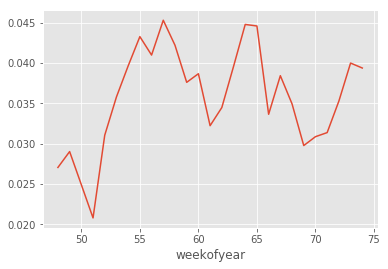

In [49]:
train.groupby(column_name)['isFraud'].mean().plot(kind='line')

In [50]:
del train[column_name]
del test[column_name]

# dayofyear

In [51]:
column_name = 'dayofyear'

In [52]:
train[column_name].head()

0    335
1    335
2    335
3    335
4    335
Name: dayofyear, dtype: int64

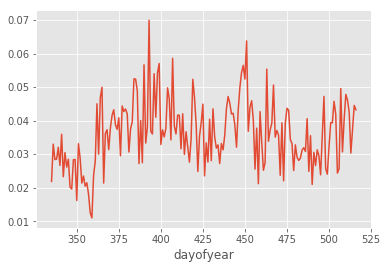

In [53]:
train.groupby(column_name)['isFraud'].mean().plot(kind='line')

In [54]:
def is_christmas(x):
    if ( x > 355) & (x < 365):
        return 1
    elif (x > 720) & (x < 730):
        return 1
    else:
        return 0

In [55]:
train[column_name + '_ischristmas'] = train[column_name].progress_apply(lambda x: is_christmas(x))
test[column_name + '_ischristmas'] = test[column_name].progress_apply(lambda x: is_christmas(x))

100%|██████████| 506691/506691 [00:00<00:00, 792751.18it/s]


# hour

In [56]:
column_name = 'hour'

In [57]:
train[column_name].head()

0    0
1    0
2    0
3    0
4    0
Name: hour, dtype: int64

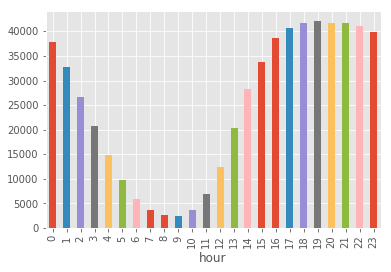

In [58]:
train.groupby(column_name)['isFraud'].count().plot(kind='bar')
plt.show()

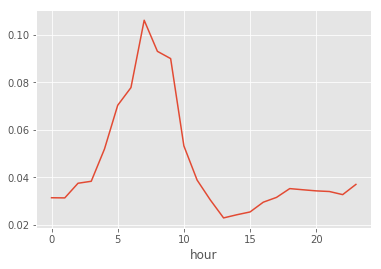

In [59]:
train.groupby(column_name)['isFraud'].mean().plot(kind='line')
plt.show()

In [60]:
hour_list = [4,5,6,7,8,9,10]
train[column_name + '_hourlist'] = train[column_name].progress_apply(lambda x: 1 if x in hour_list else 0)
test[column_name + '_hourlist'] = test[column_name].progress_apply(lambda x: 1 if x in hour_list else 0)

100%|██████████| 506691/506691 [00:00<00:00, 861844.76it/s] 


# dayofweek

In [61]:
column_name = 'dayofweek'

In [62]:
train[column_name].head()

0    4
1    4
2    4
3    4
4    4
Name: dayofweek, dtype: int64

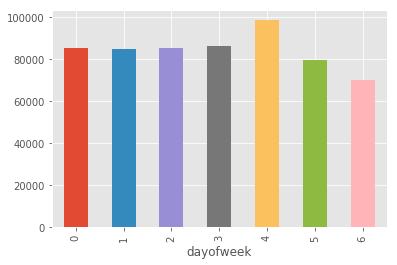

In [63]:
train.groupby(column_name)['isFraud'].count().plot(kind='bar')
plt.show()

In [64]:
train.groupby(column_name)['isFraud'].mean()

dayofweek
0    0.031452
1    0.033048
2    0.034514
3    0.037174
4    0.036040
5    0.037115
6    0.035644
Name: isFraud, dtype: float64

# day

In [65]:
column_name = 'day'

In [66]:
train[column_name].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

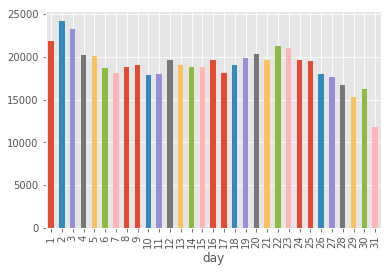

In [67]:
train.groupby(column_name)['isFraud'].count().plot(kind='bar')
plt.show()

In [68]:
train.groupby(column_name)['isFraud'].mean().tail(10)

day
22    0.032636
23    0.035337
24    0.030705
25    0.035884
26    0.034381
27    0.038727
28    0.041776
29    0.035740
30    0.041321
31    0.046909
Name: isFraud, dtype: float64

In [69]:
end_of_month = [27,28,29,30,31]
train[column_name + '_endofmonth'] = train[column_name].progress_apply(lambda x: 1 if x in end_of_month else 0)
test[column_name + '_endofmonth'] = test[column_name].progress_apply(lambda x: 1 if x in end_of_month else 0)

100%|██████████| 506691/506691 [00:00<00:00, 910149.77it/s] 


In [70]:
print(train.shape,test.shape)

(590540, 807) (506691, 806)


In [71]:
[x for x in train.columns if x not in test.columns]

['isFraud']

# DT

In [78]:
column_name = 'DT'

In [79]:
train[column_name].head()

0    2017-12-01 00:00:00
1    2017-12-01 00:00:01
2    2017-12-01 00:01:09
3    2017-12-01 00:01:39
4    2017-12-01 00:01:46
Name: DT, dtype: object

In [80]:
del train[column_name]
del test[column_name]

In [81]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [82]:
%%time
train = reduce_mem_usage(train)

Mem. usage decreased to 807.04 Mb (77.7% reduction)
CPU times: user 2min 45s, sys: 3min 1s, total: 5min 46s
Wall time: 5min 46s


In [83]:
%%time
test = reduce_mem_usage(test)

Mem. usage decreased to 710.33 Mb (77.1% reduction)
CPU times: user 1min 53s, sys: 3min 6s, total: 4min 59s
Wall time: 5min


In [84]:
train.to_csv('../input/train4.csv',index=False)
print("train finished")
test.to_csv('../input/test4.csv',index=False)
print("test finished")

train finished
test finished
